In [5]:
import tifffile
import numpy as np
import pandas as pd
import xs3d
import matplotlib.pyplot as plt
import importlib

importlib.reload(xs3d)

import os
# add path to the function
os.sys.path.append('/home/wanqing.yu/AC_Project/ac_visualization/proofreading-demo/function')
from util import *

In [2]:
# 864691135122603047	292685	L2a
# 864691135639556411_267207_L5b
rid = 864691136903144370 #864691135162983725 #864691135639556411 # 864691136134678667 #864691135122603047 #864691135755817170	 # 864691134884807418 #864691135162983725 864691135755817170 	
sid = 236197 #267207 # 271518 #292685 #588983 #518848 #495010 588983
cell_type = 'L6short-a' #'L5ET' #'L5b' # 'L6tall-a' #'L2a' 		

In [3]:
# set up path for skeletons

import skeleton_plot as skelplot
import skeleton_plot.skel_io as skel_io

#raw skeleton files
skel_path = 'https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily-pcg-skeletons/minnie_all/v661/skeletons/'

skel_dir = str(rid)+'_'+str(sid) #'864691134884807418_518848'
skel_filename = str(rid)+'_'+str(sid)+'.swc' #'864691134884807418_518848.swc'

# raw skel
skel = skel_io.read_skeleton(skel_path, skel_filename)
# get the axon segment out
axon_indices = np.where(skel.vertex_properties['compartment'] == 2)[0]
# skel.vertices


In [9]:
import navis
skel_navis = navis.read_swc(skel_path+skel_filename)
skel_navis

,
type,navis.TreeNeuron
name,864691136903144370_236197
n_nodes,7805
n_connectors,None
n_branches,39
n_leafs,51
cable_length,11642.525391
soma,[0]
units,1 dimensionless
created_at,2024-07-01 10:42:15.984428


In [10]:
skel_navis.nodes

,node_id,label,x,y,z,radius,parent_id,type
0,0,1,609.664001,904.512024,772.400024,5.805,-1,root
1,1,2,609.341980,911.786011,774.395020,0.224,0,slab
2,2,2,609.278015,913.241028,774.794983,0.224,1,slab
3,3,2,609.213013,914.695984,775.193970,0.224,2,slab
4,4,2,609.148987,916.151001,775.593018,0.224,3,slab
...,...,...,...,...,...,...,...,...
7800,7800,3,634.431030,916.254028,724.953003,0.524,7799,slab
7801,7801,3,633.997986,916.252014,723.507019,0.524,7800,slab
7802,7802,3,633.565002,916.250000,722.059998,0.103,7801,slab
7803,7803,3,633.132019,916.249023,720.614014,0.103,7802,slab


In [11]:
skel_seg1 = navis.TreeNeuron(skel_navis.nodes[skel_navis.nodes.node_id.isin(skel_navis.segments[0])])
skel_seg1


/home/wanqing.yu/anaconda3/envs/xs3d_test/lib/python3.11/site-packages/navis/graph/graph_utils.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.nodes["type"] = cl


,
type,navis.TreeNeuron
name,None
n_nodes,708
n_connectors,None
n_branches,0
n_leafs,1
cable_length,1054.874756
soma,[0]
units,1 dimensionless


In [13]:
skel_seg1.nodes['x'], skel_seg1.nodes['y'], skel_seg1.nodes['z'] = skel_seg1.nodes['x'] * 1000 / 4, skel_seg1.nodes['y'] * 1000 / 4, skel_seg1.nodes['z'] * 1000 / 40
skel_seg1.nodes

/tmp/ipykernel_2880832/1175870376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skel_seg1.nodes['x'], skel_seg1.nodes['y'], skel_seg1.nodes['z'] = skel_seg1.nodes['x'] * 1000 / 4, skel_seg1.nodes['y'] * 1000 / 4, skel_seg1.nodes['z'] * 1000 / 40


,node_id,label,x,y,z,radius,parent_id,type
0,0,1,152416.00,226128.00,19310.000000,5.805,-1,root
1,1,2,152335.50,227946.50,19359.875000,0.224,0,slab
2,2,2,152319.50,228310.25,19369.875000,0.224,1,slab
3,3,2,152303.25,228674.00,19379.849609,0.224,2,slab
4,4,2,152287.25,229037.75,19389.824219,0.224,3,slab
...,...,...,...,...,...,...,...,...
703,703,2,364244.25,193513.25,19228.474609,0.139,702,slab
704,704,2,364620.00,193488.50,19225.724609,0.139,703,slab
705,705,2,364993.00,193489.50,19220.300781,0.139,704,slab
706,706,2,365365.50,193503.50,19215.000000,0.139,705,slab


In [14]:
skel_seg1.bbox

array([[152004.75, 365666.  ],
       [187785.  , 237059.25],
       [ 17867.7 ,  19727.65]], dtype=float32)

In [156]:
fig = skel_seg1.plot3d(backend='plotly', connectors=False)

/home/wanqing.yu/anaconda3/envs/xs3d_test/lib/python3.11/site-packages/navis/graph/graph_utils.py:480: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [157]:
skel_seg1_sm = navis.smooth_skeleton(skel_seg1, window=10, to_smooth=['x', 'y', 'z'])
fig = skel_seg1_sm.plot3d(backend='plotly', connectors=False)

Smoothing:   0%|          | 0/1 [00:00<?, ?it/s]

In [198]:
skel_dp = navis.make_dotprops(skel_seg1, k=30)
skel_dp

,
type,navis.Dotprops
name,None
k,30
units,1 dimensionless
n_points,708


In [199]:
normal = skel_dp.vect[:-1]
normal_next = skel_dp.vect[1:]
parallel = np.cross(normal, normal_next)
normal, parallel

(array([[-0.5970115 , -0.80198914,  0.01976466],
        [-0.34526247, -0.93845004,  0.0102628 ],
        [-0.3452625 , -0.93845004,  0.01026281],
        ...,
        [-0.9998104 , -0.01363983,  0.01389585],
        [-0.9998104 , -0.01363983,  0.01389585],
        [-0.9998104 , -0.01363983,  0.01389585]], dtype=float32),
 array([[ 1.0317485e-02, -6.9698179e-04,  2.8336874e-01],
        [-9.3132257e-10,  0.0000000e+00, -2.9802322e-08],
        [ 1.8626451e-09, -2.3283064e-10,  2.9802322e-08],
        ...,
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32))

In [10]:
from caveclient import CAVEclient
import imageryclient as ic

datastack_name = 'minnie65_public_v661'
client = CAVEclient(datastack_name)

img_client = ic.ImageryClient(client=client)


In [193]:
skel_seg1_sm.nodes['x'][0]

152545.75

In [200]:
# testing
ctr = np.array([skel_seg1.nodes['x'][16], skel_seg1.nodes['y'][16], skel_seg1.nodes['z'][16]])
bounds_3d = ic.bounds_from_center(ctr, width=img_width, height=img_width, depth=depth)

segs = img_client.segmentation_cutout(bounds_3d, mip=mip, root_ids = rid)
image = img_client.image_cutout(bounds_3d, mip=mip)

In [201]:
ctr

array([153841. , 232639.5,  19544. ], dtype=float32)

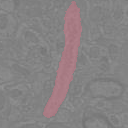

In [202]:
overlays = ic.composite_overlay(segs, imagery=image, alpha=0.3, width=3, merge_outline=False, side='in')
overlays[40]

In [188]:
bounds_3d

array([[153167, 230667,  19486],
       [154191, 231691,  19566]])

In [175]:
vertex

array([64, 64, 40])

In [236]:
img_width = 1024
depth = 80
mip = 0

img_proj_pp = []
img_proj_vv = []
seg_proj_pp = []
seg_proj_vv = []

normal = skel_dp.vect[16]
normal_next = skel_dp.vect[16+1]
# normal = [normal[2],normal[1],normal[0]]
# normal_next = [normal_next[2],normal_next[1],normal_next[0]]

parallel_pre = np.cross(normal, normal_next)

# center point inside the cutout (must be integer)
xy = int(img_width / 2**(mip+2))
vertex = np.array([xy,xy,int(depth/2)])

# voxel dimensions in e.g. nanometers
resolution = np.array([8* (2**mip),8* (2**mip),40])

# Get the first node in the skeleton
for i, node in skel_seg1.nodes.loc[16:50].iterrows():
    # Use the node's position as the center point
    ctr = np.array([node['x'], node['y'], node['z']])

    # Extract the cutout
    bounds_3d = ic.bounds_from_center(ctr, width=img_width, height=img_width, depth=depth)

    segs = img_client.segmentation_cutout(bounds_3d, mip=mip, root_ids = rid)
    image = img_client.image_cutout(bounds_3d, mip=mip)

    # image, segs = img_client.image_and_segmentation_cutout(bounds_3d, split_segmentations=True, root_ids=rid)

    # Subtract the parent node vector from the current node vector
    normal = skel_dp.vect[i]
    normal_next = skel_dp.vect[i+1]

    parallel = np.cross(normal, normal_next)
    # parallel = parallel / np.linalg.norm(parallel)

    # assuming the first parallel vector is not 0 
    # need to fix this later
    if np.all(abs(parallel < 10**-8)):
        parallel = parallel_pre 

    # img_proj_v = xs3d.slice(cutout, np.array([width/2+1,width/2+1,width/2+1]), normal, anisotropy=(4, 2.961,2.962), standardize_basis=False)
    # img_proj_p = xs3d.slice(cutout, np.array([width/2+1,width/2+1,width/2+1]), parallel, anisotropy=(4, 2.961,2.962), standardize_basis=False)
    img_proj_v = xs3d.slice_path_single(image, vertex, np.cross(normal,parallel), parallel, anisotropy=resolution)
    # img_proj_p = xs3d.slice_path_single(image, vertex, normal, parallel, anisotropy=resolution)
    
    seg_proj_v = xs3d.slice_path_single(segs, vertex, np.cross(normal,parallel), parallel, anisotropy=resolution)
    # seg_proj_p = xs3d.slice_path_single(segs, vertex, normal, parallel, anisotropy=resolution)

    parallel_pre = parallel
    
    # img_proj_pp.append(img_proj_p)
    img_proj_vv.append(img_proj_v)
    # seg_proj_pp.append(seg_proj_p)
    seg_proj_vv.append(seg_proj_v)


In [227]:
image.shape

(512, 512, 80)

In [228]:
i 

50

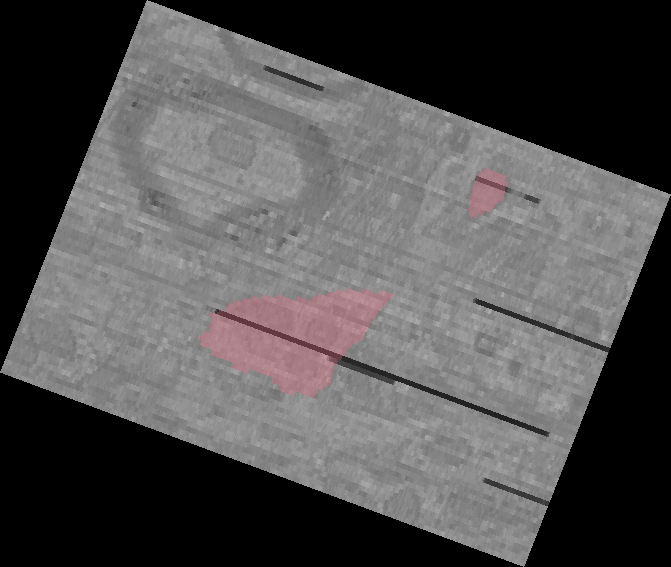

In [235]:
overlays = ic.composite_overlay(seg_proj_vv[13], imagery=img_proj_vv[13], alpha=0.3, width=3, merge_outline=False, side='in')
overlays

In [231]:
skel_dp.vect[16:16+18]

array([[-1.6376020e-01,  9.8591548e-01, -3.3959698e-02],
       [-3.5447049e-01,  9.3486470e-01, -1.9458631e-02],
       [-4.3504891e-01,  9.0032417e-01, -1.2200871e-02],
       [-4.7205585e-01,  8.8153386e-01, -7.8311786e-03],
       [-5.2903712e-01,  8.4859824e-01, -8.9237938e-04],
       [-5.2332371e-01,  8.5212660e-01,  3.5417690e-03],
       [-4.7782177e-01,  8.7839603e-01,  1.0329832e-02],
       [-3.5135338e-01,  9.3590653e-01,  2.5096089e-02],
       [-3.5135341e-01,  9.3590647e-01,  2.5096087e-02],
       [-3.5135341e-01,  9.3590647e-01,  2.5096087e-02],
       [-3.5135344e-01,  9.3590647e-01,  2.5096089e-02],
       [-3.5135341e-01,  9.3590647e-01,  2.5096091e-02],
       [-3.5135338e-01,  9.3590653e-01,  2.5096091e-02],
       [-4.0086702e-01,  9.1502553e-01,  4.5099463e-02],
       [-4.0086702e-01,  9.1502553e-01,  4.5099463e-02],
       [-4.0086696e-01,  9.1502553e-01,  4.5099452e-02],
       [-4.0086696e-01,  9.1502553e-01,  4.5099456e-02],
       [-4.0086702e-01,  9.1502

In [223]:
skel_seg1.nodes.loc[16:16+18]

,node_id,label,x,y,z,radius,parent_id,type
16,16,2,153841.00,232639.50,19544.000000,0.224,15,slab
17,17,2,153718.25,232987.50,19547.224609,0.224,16,slab
18,18,2,153548.50,233307.00,19557.675781,0.224,17,slab
19,19,2,153383.50,233636.75,19564.800781,0.224,18,slab
20,20,2,153212.00,233969.75,19569.300781,0.224,19,slab
21,21,2,153022.25,234287.00,19575.949219,0.224,20,slab
22,22,2,152811.25,234598.75,19578.625000,0.224,21,slab
23,23,2,152616.00,234920.25,19579.025391,0.224,22,slab
24,24,2,152476.00,235269.25,19579.250000,0.224,23,slab
25,25,2,152401.75,235635.00,19583.175781,0.224,24,slab


In [206]:
# # Determine the maximum dimensions
# max_height = max(img.shape[0] for img in img_proj_pp)
# max_width = max(img.shape[1] for img in img_proj_pp)

# # Create a new list to hold the padded images
# img_proj_pp_padded = []
# seg_proj_pp_padded = []

# # Pad each image
# for img in img_proj_pp:
#     # Determine the padding amounts
#     pad_height = max_height - img.shape[0]
#     pad_width = max_width - img.shape[1]
    
#     # Split the padding amounts evenly between the top/bottom and left/right
#     pad_height1, pad_height2 = pad_height // 2, pad_height - pad_height // 2
#     pad_width1, pad_width2 = pad_width // 2, pad_width - pad_width // 2
    
#     # Pad the image
#     img_padded = np.pad(img, ((pad_height1, pad_height2), (pad_width1, pad_width2)))
    
#     # Add the padded image to the list
#     img_proj_pp_padded.append(img_padded)

# # Pad each image
# for img in seg_proj_pp:
#     # Determine the padding amounts
#     pad_height = max_height - img.shape[0]
#     pad_width = max_width - img.shape[1]
    
#     # Split the padding amounts evenly between the top/bottom and left/right
#     pad_height1, pad_height2 = pad_height // 2, pad_height - pad_height // 2
#     pad_width1, pad_width2 = pad_width // 2, pad_width - pad_width // 2
    
#     # Pad the image
#     img_padded = np.pad(img, ((pad_height1, pad_height2), (pad_width1, pad_width2)))
    
#     # Add the padded image to the list
#     seg_proj_pp_padded.append(img_padded)

# # Convert the list back to a numpy array
# img_proj_pp_padded = np.array(img_proj_pp_padded)
# seg_proj_pp_padded = np.array(seg_proj_pp_padded)

# img_proj_pp_padded_t = np.transpose(img_proj_pp_padded, (1, 2, 0))
# seg_proj_pp_padded_t = np.transpose(seg_proj_pp_padded, (1, 2, 0))

# overlays_pp = ic.composite_overlay(seg_proj_pp_padded_t, imagery=img_proj_pp_padded_t, alpha=0.3, width=3, merge_outline=False, side='in')
# overlays_pp

# # imsave('/home/wanqing.yu/AC_Project/ac_visualization/proofreading-demo/0002/img_proj_v_new_rs_smooth.tif', img_proj_vv_padded)

[<PIL.Image.Image image mode=RGBA size=175x107>,
 <PIL.Image.Image image mode=RGBA size=175x107>,
 <PIL.Image.Image image mode=RGBA size=175x107>,
 <PIL.Image.Image image mode=RGBA size=175x107>,
 <PIL.Image.Image image mode=RGBA size=175x107>,
 <PIL.Image.Image image mode=RGBA size=175x107>,
 <PIL.Image.Image image mode=RGBA size=175x107>,
 <PIL.Image.Image image mode=RGBA size=175x107>,
 <PIL.Image.Image image mode=RGBA size=175x107>,
 <PIL.Image.Image image mode=RGBA size=175x107>,
 <PIL.Image.Image image mode=RGBA size=175x107>,
 <PIL.Image.Image image mode=RGBA size=175x107>,
 <PIL.Image.Image image mode=RGBA size=175x107>,
 <PIL.Image.Image image mode=RGBA size=175x107>,
 <PIL.Image.Image image mode=RGBA size=175x107>,
 <PIL.Image.Image image mode=RGBA size=175x107>,
 <PIL.Image.Image image mode=RGBA size=175x107>,
 <PIL.Image.Image image mode=RGBA size=175x107>,
 <PIL.Image.Image image mode=RGBA size=175x107>,
 <PIL.Image.Image image mode=RGBA size=175x107>,
 <PIL.Image.Image im

In [232]:
# Determine the maximum dimensions
max_height = max(img.shape[0] for img in img_proj_vv)
max_width = max(img.shape[1] for img in img_proj_vv)

# Create a new list to hold the padded images
img_proj_vv_padded = []
seg_proj_vv_padded = []

# Pad each image
for img in img_proj_vv:
    # Determine the padding amounts
    pad_height = max_height - img.shape[0]
    pad_width = max_width - img.shape[1]
    
    # Split the padding amounts evenly between the top/bottom and left/right
    pad_height1, pad_height2 = pad_height // 2, pad_height - pad_height // 2
    pad_width1, pad_width2 = pad_width // 2, pad_width - pad_width // 2
    
    # Pad the image
    img_padded = np.pad(img, ((pad_height1, pad_height2), (pad_width1, pad_width2)))
    
    # Add the padded image to the list
    img_proj_vv_padded.append(img_padded)

# Pad each image
for img in seg_proj_vv:
    # Determine the padding amounts
    pad_height = max_height - img.shape[0]
    pad_width = max_width - img.shape[1]
    
    # Split the padding amounts evenly between the top/bottom and left/right
    pad_height1, pad_height2 = pad_height // 2, pad_height - pad_height // 2
    pad_width1, pad_width2 = pad_width // 2, pad_width - pad_width // 2
    
    # Pad the image
    img_padded = np.pad(img, ((pad_height1, pad_height2), (pad_width1, pad_width2)))
    
    # Add the padded image to the list
    seg_proj_vv_padded.append(img_padded)

# Convert the list back to a numpy array
img_proj_vv_padded = np.array(img_proj_vv_padded)
seg_proj_vv_padded = np.array(seg_proj_vv_padded)

img_proj_vv_padded_t = np.transpose(img_proj_vv_padded, (1, 2, 0))
seg_proj_vv_padded_t = np.transpose(seg_proj_vv_padded, (1, 2, 0))


overlays_vv = ic.composite_overlay(seg_proj_vv_padded_t, imagery=img_proj_vv_padded_t, alpha=0.3, width=3, merge_outline=False, side='in')
overlays_vv

# imsave('/home/wanqing.yu/AC_Project/ac_visualization/proofreading-demo/0002/img_proj_v_new_rs_smooth.tif', img_proj_vv_padded)

[<PIL.Image.Image image mode=RGBA size=707x451>,
 <PIL.Image.Image image mode=RGBA size=707x451>,
 <PIL.Image.Image image mode=RGBA size=707x451>,
 <PIL.Image.Image image mode=RGBA size=707x451>,
 <PIL.Image.Image image mode=RGBA size=707x451>,
 <PIL.Image.Image image mode=RGBA size=707x451>,
 <PIL.Image.Image image mode=RGBA size=707x451>,
 <PIL.Image.Image image mode=RGBA size=707x451>,
 <PIL.Image.Image image mode=RGBA size=707x451>,
 <PIL.Image.Image image mode=RGBA size=707x451>,
 <PIL.Image.Image image mode=RGBA size=707x451>,
 <PIL.Image.Image image mode=RGBA size=707x451>,
 <PIL.Image.Image image mode=RGBA size=707x451>,
 <PIL.Image.Image image mode=RGBA size=707x451>,
 <PIL.Image.Image image mode=RGBA size=707x451>,
 <PIL.Image.Image image mode=RGBA size=707x451>,
 <PIL.Image.Image image mode=RGBA size=707x451>,
 <PIL.Image.Image image mode=RGBA size=707x451>,
 <PIL.Image.Image image mode=RGBA size=707x451>,
 <PIL.Image.Image image mode=RGBA size=707x451>,
 <PIL.Image.Image im

In [208]:
# from PIL import Image

# # Assuming `images` is your array of PIL.Image.Image objects
# overlays_pp[0].save('/home/wanqing.yu/AC_Project/ac_visualization/proofreading-demo/EM_test/overlay_p.gif', save_all=True, append_images=overlays_pp[1:], optimize=True, duration=100, loop=0)
# overlays_vv[0].save('/home/wanqing.yu/AC_Project/ac_visualization/proofreading-demo/EM_test/overlay_v.gif', save_all=True, append_images=overlays_vv[1:], optimize=True, duration=100, loop=0)

In [233]:
import numpy as np
import tifffile

# Convert PIL images to a list of NumPy arrays
image_overlay_vv = [np.array(img) for img in overlays_vv]
# image_overlay_pp = [np.array(img) for img in overlays_pp]

# Stack arrays along a new dimension to create a 3D array
stacked_images = np.stack(image_overlay_vv, axis=0)

# Save the 3D array as a TIFF
tifffile.imwrite('/home/wanqing.yu/AC_Project/ac_visualization/proofreading-demo/EM_test/overlay_vv.tif', stacked_images)

In [75]:
#  # save the cutout image volume as tif
# imsave('cutout.tif', cutout)

/tmp/ipykernel_2250885/2283751380.py:2: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave('cutout.tif', cutout)
